## 7.1.1Overlapping class distributions

修改支持向量机，允许一些训练数据点被误分类。引入松弛变量$\xi_n\ge0$，每个训练数据点都有一个松弛变量。分类的限制条件为:
$$t_ny(x_)\ge1-\xi_n$$
+ $\xi_n=0$的数据点被分类正确，在边缘上，或在边缘的正确一侧
+ $0<\xi_n\leq1$的数据点位于边缘内部，但在决策边界的正确一侧、
+ $\xi_n>0$的数据点位于决策边界的错误一侧，是被错误分类的点。

对比线性可分的情况，我们需要最小化$$C\sum_{n=1}^N\xi_n+\frac{1}{2}\lVert{w}\lVert^2$$
参数C类似于正则化系数
Lagrange函数为:
$$L(w,b,\xi,a,\mu)=\frac{1}{2}\lVert{w}\lVert^2+C\sum_{n=1}^N\xi_n-\sum_{n=1}^Na_n\{t_ny(x_n)-1+\xi_n\}-\sum_{n=1}^N\mu_n\xi_n$$
其中${a_n\ge0}$和${\mu_n\ge0}$是lagrange乘数，对应的KKT条件:
$$\begin{cases}
a_n\ge0\\
t_ny(x_n)-1+\xi_n\ge0\\
a_n(t_ny(x_n)-1+\xi_n)=0\\
\mu_n\ge0\\
\xi_n\ge0\\
\mu_n\xi_n=0
\end{cases}$$

对$w,b,{\xi_n}$进行最优化:
$$\frac{\partial L}{\partial w}=0\Rightarrow w=\sum_{n=1}^Na_nt_n\phi(x_n)$$
$$\frac{\partial b}{\partial w}=0\Rightarrow w=\sum_{n=1}^Na_nt_n$$
$$\frac{\partial \xi}{\partial w}=0\Rightarrow a_n=C-\mu_n$$

得到对偶形式:
$$\tilde{L}(a)=\sum_{n=1}^Na_n-\frac{1}{2}\sum_{n=1}^N\sum_{m=1}^Na_na_mt_nt_mk(x_n,x_m)$$
满足条件:
$$\begin{cases}
0\leq a_n\leq C\\
\sum_{n=1}^Na_nt_n=0
\end{cases}$$

* 对于数据点的一个子集，$a_n=0$，这些点对预测模型没有作用
* $C\ge a_n>0$的点组成了支持向量

$C\ge a_n>0$的支持向量满足$\xi_n=0$即$y_ny(x_n)=1$,满足:
$$t_n(\mathop\sum_{m\in{s}}a_mt_mk(x_n,x_m)+b)=1$$
$$b=\frac{1}{N_M}\mathop\sum_{m\in{s}}(t_n-\mathop\sum_{m\in{s}}a_na_mt_mk(x_n,x_m))$$

In [1]:
import sys
sys.path.append(r"../")
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from prml.kernel import (
    RBF,
    PolynomialKernel,
    SupportVectorClassifier,
    RelevanceVectorRegressor,
    RelevanceVectorClassifier
)

np.random.seed(1234)

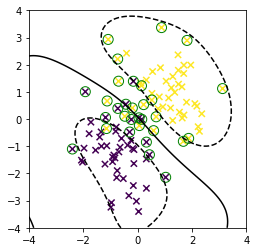

In [2]:
def create_toy_data():
    x0 = np.random.normal(size=100).reshape(-1, 2) - 1.
    x1 = np.random.normal(size=100).reshape(-1, 2) + 1.
    x = np.concatenate([x0, x1])
    y = np.concatenate([-np.ones(50), np.ones(50)]).astype(np.int)
    return x, y

x_train, y_train = create_toy_data()

model = SupportVectorClassifier(RBF(np.array([1., 0.5, 0.5])), C=1.)
model.fit(x_train, y_train)

x0, x1 = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
x = np.array([x0, x1]).reshape(2, -1).T
plt.scatter(x_train[:, 0], x_train[:, 1], s=40, c=y_train, marker="x")
plt.scatter(model.X[:, 0], model.X[:, 1], s=100, facecolor="none", edgecolor="g")
plt.contour(x0, x1, model.distance(x).reshape(100, 100), np.arange(-1, 2), colors="k", linestyles=("dashed", "solid", "dashed"))
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.gca().set_aspect("equal", adjustable="box")

核函数对应于特征空间中的内积。特征空间可以是⾼维的，甚⾄是⽆穷维的。
通过直接对核函数操作，⽽不显式地引⼊特征空间，⽀持向量机或许在⼀定程度上避免了维度
灾难的问题。

## 7.1.2与Logistic回归的关系

对于分类正确的点,满足$y_nt_n\ge1$,有$\xi_n=0$,剩下的点有$\xi_n=1-y_nt_n$,目标函数keloid写成
$$\sum_{n=1}^NE_{SV}(y_nt_n)+\lambda\lVert{w}\lVert^2$$
其中$\lambda=(2C)^{-1}$，$E_{SV}$是hinge误差函数:
$$E_{SV}(y_nt_n)=[1-y_nt_n]_{+}$$
而$$\sum_{n=1}^NE_{LR}(y_nt_n)+\lambda\lVert{w}\lVert^2$$
$$E_{LR}(yt)=ln(1+exp(-yt))$$
关键的区别在
于$E_{SV} (yt)$的平台区域产⽣了稀疏解,最小化分类错误率时，一个单调递减的误差函数是更好的选择

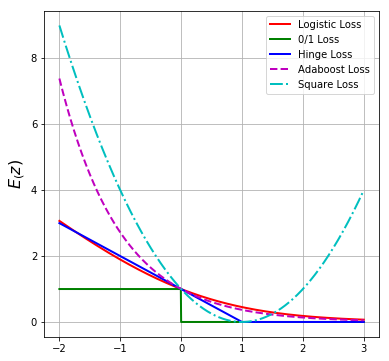

In [5]:
x=np.linspace(-2,3,1001,dtype=np.float)
y_logit=np.log(1+np.exp(-x))/np.log(2)
y_boost=np.exp(-x)
y_0_1=x<0
y_hinge=1.0-x
y_hinge[y_hinge<0]=0
y_square=(x-1)**2
plt.figure(figsize=(6,6))
plt.plot(x,y_logit,'r',label='Logistic Loss',lw=2)
plt.plot(x,y_0_1,'g',label='0/1 Loss',lw=2)
plt.plot(x,y_hinge,'b',label='Hinge Loss',lw=2)
plt.plot(x,y_boost,'m--',label='Adaboost Loss',lw=2)
plt.plot(x,y_square,'c-.',label='Square Loss',lw=2)
plt.grid()
plt.ylabel("$E_(z)$",fontsize=16)
plt.legend()